# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

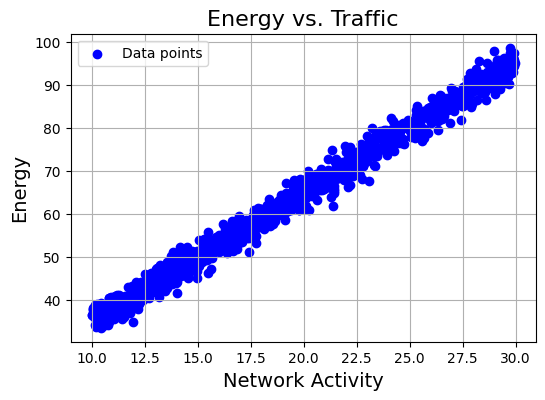

In [125]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

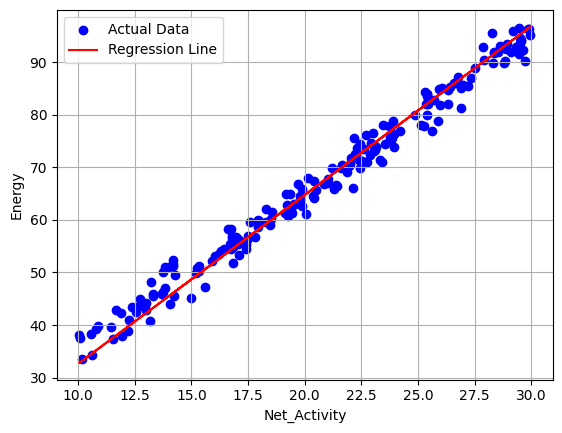

The linear regression formula is: y = 0.502 + (3.213 * x1)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(data['Net_Activity'], data['Energy'], test_size=0.2)
#* This line may be needed on first run, but for some reason it causes an error later. Commenting it out makes the code run normally.

lr = LinearRegression()

# lr.fit(data['Net_Activity'], data['Energy'])
lr.fit(X_train, y_train)

# y_pred = lr.predict(data['Net_Activity'])
y_pred = lr.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test - predictions)**2)

acc = mse(y_test, y_pred)

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Net_Activity')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()
plt.show()

w = lr.weights
b = lr.bias        

formula = f"y = {b:.3f}"
for i, w in enumerate(w):
    formula += f" + ({w:.3f} * x{i+1})"

print(f"The linear regression formula is: {formula}")


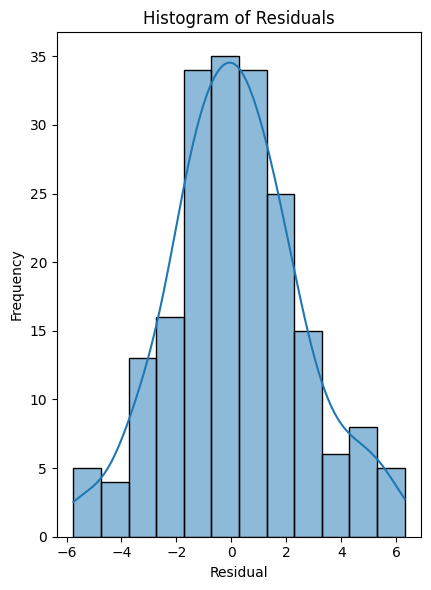

In [127]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(y_test-y_pred, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#* We see that the most frequent errors are in the range [-2, 3]

#* An estimator of a parameter is unbiased if its expected value is equal to the true value of the parameter
#* ô is an unbiased parameter of O if E[ô] = O.



## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [128]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_2 = train[['x0', 'x1']] 
y_2 = train['y']
X_2_test = test[['x0', 'x1']]
y_2_test = test['y']

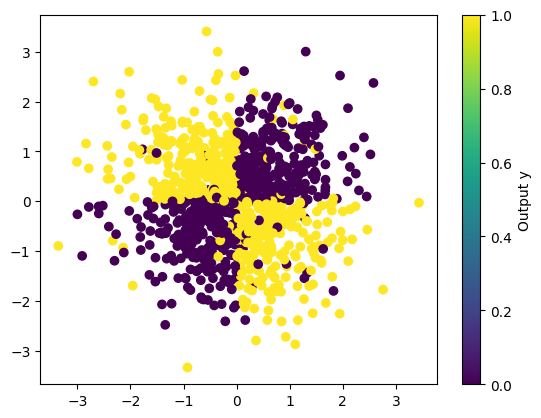

Accuracy (lor, 2D): 0.522
Accuracy (new feature): 0.955
Accuracy (clf): 0.878


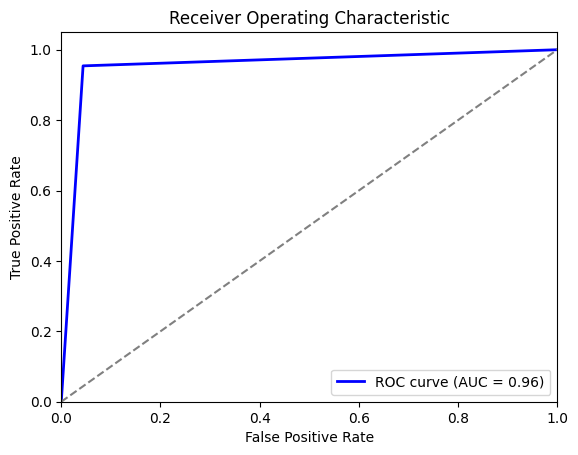

In [129]:
from sklearn.preprocessing import MinMaxScaler
from logistic_regression import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


#* Hentet fra piazza
plt.scatter(data["x0"],data["x1"],c=data["y"], label="All data") 
plt.colorbar(label="Output y") 
plt.show()


#! Basic logistic regression
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_2)
X_test_scaled = min_max_scaler.transform(X_2_test)

lor = LogisticRegression()
lor.fit(X_train_scaled, y_2)
y_pred_2 = lor.predict(X_test_scaled)

def accuracy(true_values, predictions):
    return np.mean(true_values == predictions)

print(f"Accuracy (lor, 2D): {accuracy(y_pred_2, y_2_test)}")

#! Logistic regression: Feature engineering
#* Add new feature
new_feature = []
x0_features = data['x0']
x1_features = data['x1']

for i in range(len(x0_features)):
    value = x0_features[i]*x1_features[i]
    bool = 0
    if value < 0:
        bool = -1
        new_feature.append(bool)
    else:
        bool = 1
        new_feature.append(bool)

data['x2'] = new_feature

columns = data.columns.tolist()  
split_index = columns.index('y') 

columns.insert(split_index, columns.pop(columns.index('x2')))

data = data[columns]

data.to_csv('new_mission2.csv', index=False)

new_data = pd.read_csv('new_mission2.csv')

X_new = new_data[['x0', 'x1', 'x2']]
y_new = new_data['y']

X_train_nf, X_test_nf, y_train_nf, y_test_nf = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

lor.fit(X_train_nf, y_train_nf)
y_pred_nf = lor.predict(X_test_nf)

acc_nf = accuracy_score(y_test_nf, y_pred_nf)

print(f"Accuracy (new feature): {acc_nf}")



fpr, tpr, thresholds = roc_curve(y_test_nf, y_pred_nf)
roc_auc = auc(fpr, tpr)



#! Decision tree 
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_2, y_2)
y_pred_clf = clf.predict(X_2_test)

acc_clf = accuracy_score(y_2_test, y_pred_clf)
print(f"Accuracy (clf): {acc_clf}")


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()






We see that we get an accuracy score of only 0.522, essentially 50% accuracy. The reason for this can be seen by running the code above that generates the distribution of the data x0, x1. We see that no matter how you make a linear line, half of the data will be on the other side. 
This is can be solved by switching from 2D to 3D, and changing the level at which x0 and x1 are. 

I added a new feature x2, which is essentially an XOR function done on x0 and x1. We see from the plot above that if both x0 and x1 are positive (or both negative), the data is purple. However, if either one is negatvie while the other positive, they are coloured yellow. x2 therefore takes the value -1 or 1 depending on the values of x0 and x1. I again do logistic regression based x0, x1 AND x2, resulting in an accuracy score of 0.955. 

The inductive bias of a model is the set of assumptions that makes the model learn one pattern instead of another. For logitstic regression, the inductive bias is that there is a simple boundry between 0s and 1s. In this case there isn't one (initially on a 2D plane), hence the poor performance. 

Decision trees can be used for regression and it does not need scaling of the data (feature scaling). It can also capture non-linear relationships between features and target variables. In short, decision trees are a viable option for this task.


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [130]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

ROC-AUC SCORE: 0.7360


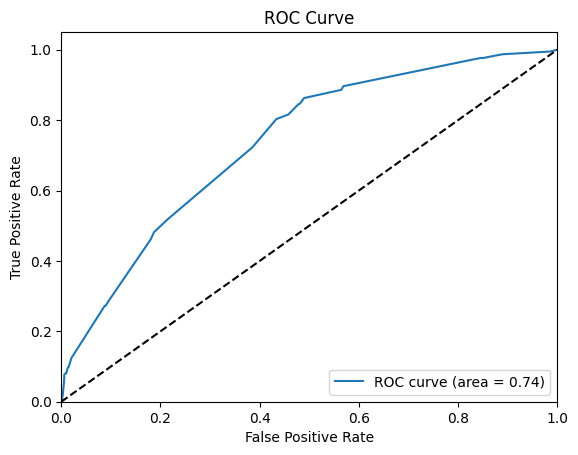

ROC-AUC SCORE (Random Forest Classifier): 0.7221


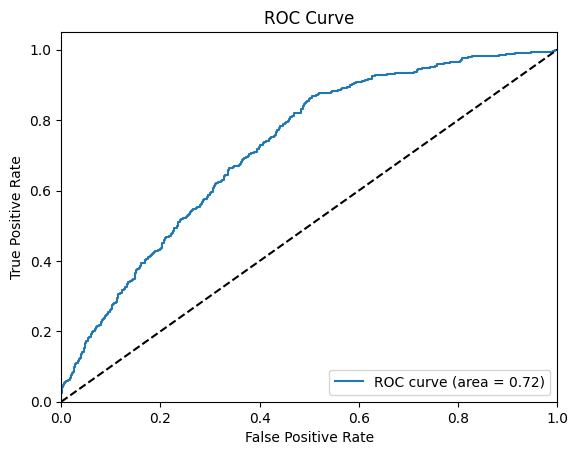

In [131]:

#! Reminder: Run the above code cell first, then run this one

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


d3_train = (train['data_stream_3'] * 1000).astype(int) % 2
d3_test = (test['data_stream_3'] * 1000).astype(int) % 2

train.drop(columns = ["data_stream_3"])
test.drop(columns = ["data_stream_3"])

train.loc[:, "data_stream_3"] = d3_train
test.loc[:, "data_stream_3"] = d3_test

feature_columns = ["data_stream_0", "data_stream_1", "data_stream_2", "data_stream_3", 
                   "data_stream_4", "data_stream_5", "data_stream_6", "data_stream_7", 
                   "data_stream_8", "data_stream_9", "data_stream_10"]

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(train[feature_columns], train["target"])

y_predict_proba = clf.predict_proba(test[feature_columns])[:, 1]
roc_auc = roc_auc_score(test["target"], y_predict_proba)
print(f"ROC-AUC SCORE: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(test["target"], y_predict_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


rfc = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=42)
rfc.fit(train[feature_columns], train["target"])

y_predict_proba_rfc = rfc.predict_proba(test[feature_columns])[:, 1]
roc_auc_rfc = roc_auc_score(test["target"], y_predict_proba_rfc)
print(f"ROC-AUC SCORE (Random Forest Classifier): {roc_auc_rfc:.4f}")

fpr, tpr, thresholds = roc_curve(test["target"], y_predict_proba_rfc)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



I manipulated the data from both CSV files, more specifically, I manipulated the data from the feature "data_stream_3". I got the correct line of code to manipulate it from Piazza. It is supposed to highlight a pattern between data_stream_3 and the target values. After that I changed the max_depth to 6, which yielded a ROC-AUC score of 0.7340. From the plot we see that despite the false positive rate being increasing, the true positive rate will be higher and increase at a higher rate than FPR.

ROC-AUC, or "Area Under the Receiver Operating Characteristic", is a representation of the performance of a classification model. ROC plots the true positive rate (TPR) vs the false positive rate (FPR). AUC represents the area under the ROC curve. Only 20% of the data is critical. Meaning if we used normal accuracy rating the accuracy score would be inflated. If would come back as high, despite the model not actually being very accurate. That is why we use AUC as well. ROC AUC will therefore provide a better sense of the model performance accuracy when the data is imbalanced. 

The random forest model, without really changing the hyperparameters, return a ROC AUC score of 0.7221, which is slightly below 0.74. 


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [132]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

First and foremost I analyzed the test and traning csv files, and noticed a data discrepency. The code in the second code block below plots and compares the same feature values from both files. By looking at the files I realized that the columns should be shifted one place to the right. For example, the values for nexus_rating should be for energy_footprint. The values for grid_connections should be sent to nexus_rating. This goes for every feature except ownership_type. 

We use RMSLE since the target value, nexus_rating, has a wide range of values. The logarithm will scale down the values. It will also reduce the impact of outliers in the data. Since we are using catboost, the loss function we used was RMSE.

We plot the feature importances and notice that energy_footprint weighs a lot more than the other features. This makes sense since according to the mission some buildings provide more power than others, meaning the energy_footprint should be higher for those buildings and it should be an important feature when analyzing. 

We use the catboost library to do the ensamble learning. CatBoost handles NaN values automatically. I changed the hyperparameters through trial and failure.

Train_test_split would be an appropriate method to use when you dont have test targets. 

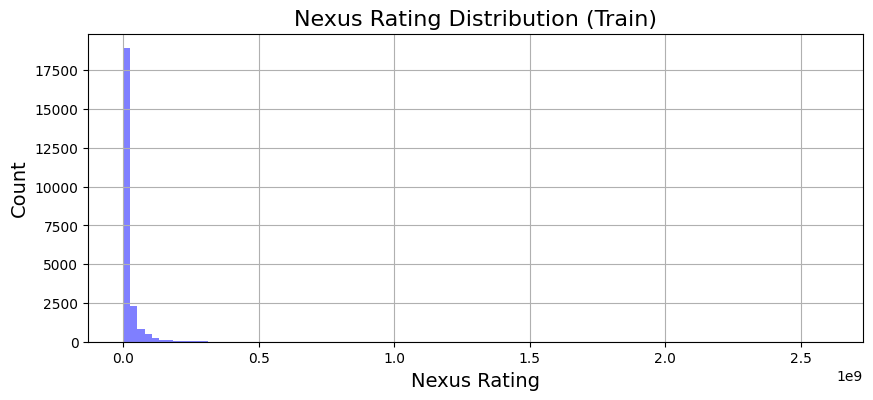

In [133]:

#! Run this code block ONCE after having ran the code block above 
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

col = ['nexus_rating', 'energy_footprint',
       'core_reactor_size', 'harvesting_space', 'vertical_alignment',
       'power_chambers', 'energy_flow_design', 'upper_collector_height',
       'shared_conversion_units', 'isolated_conversion_units',
       'internal_collectors', 'external_collectors', 'ambient_harvesters',
       'shielded_harvesters', 'efficiency_grade', 'grid_connections']

#! Shift every column, except the first, one to the right
arr = [test[i] for i in col]

test['energy_footprint'] = arr[0]
test['core_reactor_size'] = arr[1]
test['harvesting_space'] = arr[2]
test['vertical_alignment'] = arr[3]
test['power_chambers'] = arr[4]
test['energy_flow_design'] = arr[5]
test['upper_collector_height'] = arr[6]
test['shared_conversion_units'] = arr[7]
test['isolated_conversion_units'] = arr[8]
test['internal_collectors'] = arr[9]
test['external_collectors'] = arr[10]
test['ambient_harvesters'] = arr[11]
test['shielded_harvesters'] = arr[12]
test['efficiency_grade'] = arr[13]
test['grid_connections'] = arr[14]
test['nexus_rating'] = arr[15]

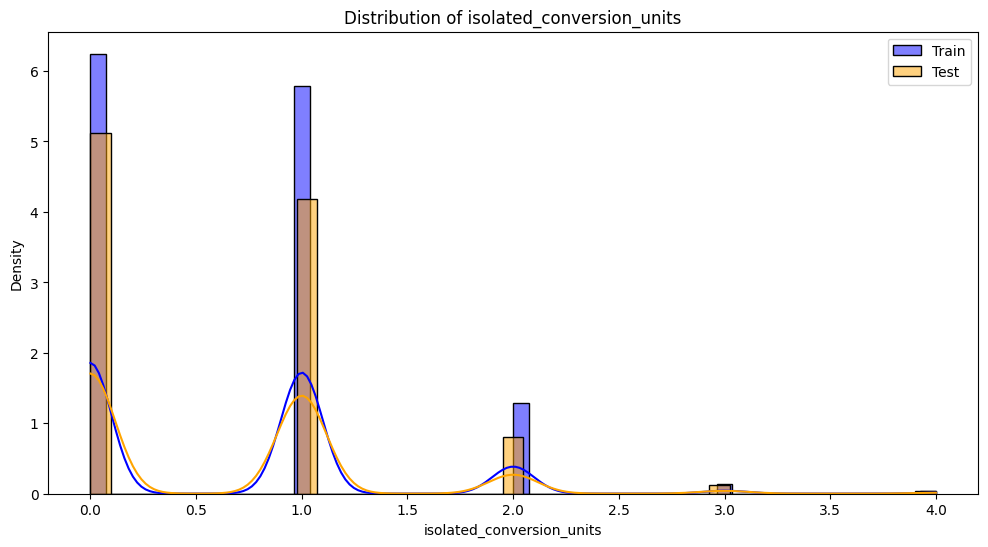

In [134]:

#! Compare features to make sure the above code cell worked 

feature_to_compare = 'isolated_conversion_units'
plt.figure(figsize=(12, 6))
sns.histplot(train[feature_to_compare], color='blue', label='Train', kde=True, stat='density', alpha=0.5)
sns.histplot(test[feature_to_compare], color='orange', label='Test', kde=True, stat='density', alpha=0.5)
plt.title(f'Distribution of {feature_to_compare}')
plt.legend()
plt.show()

In [135]:
from sklearn.metrics import mean_squared_log_error
import numpy as np


def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [136]:
from catboost import CatBoostRegressor

features = ['ownership_type', 'energy_footprint', 'core_reactor_size', 'harvesting_space', 'vertical_alignment',
            'power_chambers', 'energy_flow_design', 'upper_collector_height', 'shared_conversion_units',
            'isolated_conversion_units', 'internal_collectors', 'external_collectors', 'ambient_harvesters',
            'shielded_harvesters', 'efficiency_grade', 'grid_connections']

target = 'nexus_rating'

model = CatBoostRegressor(iterations=1500, depth=9, learning_rate=0.0279, verbose=100)
model.fit(train[features], np.log(train[target]))
test['pred'] = np.exp(model.predict(test[features]))


print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
# print('RMSLE: ', round(rmsle(test['nexus_rating'], test['pred']), 3))


0:	learn: 0.8464426	total: 12ms	remaining: 18s
100:	learn: 0.3295149	total: 941ms	remaining: 13s
200:	learn: 0.2982965	total: 1.86s	remaining: 12s
300:	learn: 0.2842699	total: 2.8s	remaining: 11.1s
400:	learn: 0.2735210	total: 3.76s	remaining: 10.3s
500:	learn: 0.2646324	total: 4.71s	remaining: 9.4s
600:	learn: 0.2565585	total: 5.65s	remaining: 8.45s
700:	learn: 0.2497178	total: 6.58s	remaining: 7.5s
800:	learn: 0.2435143	total: 7.53s	remaining: 6.57s
900:	learn: 0.2378533	total: 8.47s	remaining: 5.63s
1000:	learn: 0.2323159	total: 9.41s	remaining: 4.69s
1100:	learn: 0.2273963	total: 10.3s	remaining: 3.75s
1200:	learn: 0.2229513	total: 11.3s	remaining: 2.8s
1300:	learn: 0.2190736	total: 12.2s	remaining: 1.87s
1400:	learn: 0.2149803	total: 13.2s	remaining: 933ms
1499:	learn: 0.2115605	total: 14.1s	remaining: 0us
RMSLE:  0.29383503878277945


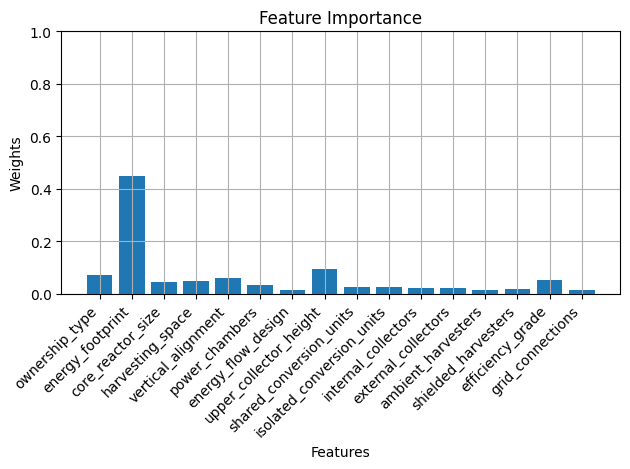

In [137]:
feature_importance = model.get_feature_importance()

sum_importance = sum(feature_importance)
scaled_values = [x / sum_importance for x in feature_importance]

features2 = [
    "ownership_type",
    "energy_footprint",
    "core_reactor_size",
    "harvesting_space",
    "vertical_alignment",
    "power_chambers",
    "energy_flow_design",
    "upper_collector_height",
    "shared_conversion_units",
    "isolated_conversion_units",
    "internal_collectors",
    "external_collectors",
    "ambient_harvesters",
    "shielded_harvesters",
    "efficiency_grade",
    "grid_connections"
]

plt.bar(features2, scaled_values)
plt.xticks(rotation = 45, ha="right")
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Feature Importance')
plt.tight_layout()
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout() 
plt.show()
